# Тестовое задание на позицию Аналитик.

# 1. Импорт библиотек и загрузка данных

## 1.1 Импорт библиотек

Импортированы библиотеки для анализа данных и визуализации:
- pandas
- matplotlib.pyplot
- seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2 Загрузка данных

Данные загружены из Excel-файла. Таблица содержит:
- Названия товаров
- Базовые цены
- Продавцов

In [2]:
# Загрузка Excel-файла
df = pd.read_excel("Тестовое задание.xlsx", sheet_name="DATA")

## 1.3 Предварительная обработка

- Проведена минимальная очистка: из названий столбцов удалены лишние пробелы
- Проверены первые строки таблицы (`head()`), чтобы убедиться в корректной загрузке данных

In [3]:
# Удалим пробелы из названий столбцов
df.columns = df.columns.str.strip()

# Посмотрим первые строки
df.head()

,Название,Бренд,SKU,Артикул,Базовая цена товара,"Скидка, %",Дата заказа,Дата продажи,Дата обратной логистики,Регион
0,Батончики спортивные,SHOCKS!,316681710.0,НФ-00007690,1572.0,40,2025-04-02 10:34:10,\N,\N,Москва
1,Батончики спортивные,SHOCKS!,149763478.0,НФ-00003565,1307.0,40,2025-04-02 10:33:53,\N,\N,Краснодарский край
2,Батончики спортивные,FitnesSHOCK,225408190.0,НФ-00005868,1730.0,40,2025-04-02 10:33:53,\N,\N,Мурманская область
3,Батончики спортивные,FitnesSHOCK,316698987.0,НФ-00008822,2044.0,41,2025-04-02 10:31:49,\N,2025-04-02 10:31:49,Минск
4,Батончики спортивные,FitnesSHOCK,225408190.0,НФ-00005868,1730.0,40,2025-04-02 10:31:18,\N,\N,Москва


## 1.4 Описательная статистика

Вычислены ключевые статистики по цене:
- Среднее значение
- Медиана
- Минимум и максимум

In [4]:
# Описательная статистика по "Базовая цена товара"
df["Базовая цена товара"].describe()

count    383324.000000
mean       1535.684921
std         548.987665
min           0.000000
25%        1349.000000
50%        1449.000000
75%        1549.000000
max        7435.000000
Name: Базовая цена товара, dtype: float64

## 1.5 Подсчёт количества продаж

Проведён групповой анализ по каждому товару:
- Подсчитано количество продаж (число повторов каждого товара в данных)
- Вычислена средняя цена продажи по каждому товару

Ниже представлена таблица **топ-5 товаров по количеству продаж**.

In [5]:
# Считаем количество продаж и среднюю цену по каждому товару
sales_per_product = df.groupby("Название").agg({
    "Базовая цена товара": "mean",
    "Название": "count"
}).rename(columns={"Название": "Количество продаж"})

# Показываем топ-5 товаров по количеству продаж
sales_per_product.sort_values("Количество продаж", ascending=False).head(5)

,Базовая цена товара,Количество продаж
Название,,
Батончики спортивные,1475.984952,213181
Печенье спортивное,1605.670127,169433
Протеин,4467.257541,431
Коробки картонные,0.000000,261
Батончики шоколадные,1920.176471,17


# 2. Анализ зависимости между ценой и количеством продаж

## 2.1 Код для визуализации:

**Рисунок 1.** Диаграмма зависимости между ценой и количеством продаж:

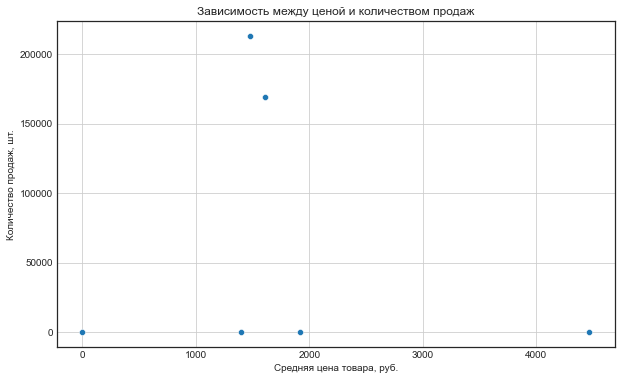

In [6]:
# Стиль графика
plt.style.use("seaborn-white")

# Увеличим размер графика
plt.figure(figsize=(10, 6))

# Диаграмма рассеяния
sns.scatterplot(
    data=sales_per_product,
    x="Базовая цена товара",
    y="Количество продаж"
)

plt.title("Зависимость между ценой и количеством продаж")
plt.xlabel("Средняя цена товара, руб.")
plt.ylabel("Количество продаж, шт.")
plt.grid(True)
plt.show()

## 2.2 Коэффициент корреляции между ценой и количеством продаж

In [7]:
# Коэффициент корреляции Пирсона
correlation = sales_per_product["Базовая цена товара"].corr(sales_per_product["Количество продаж"])
print(f"Коэффициент корреляции: {correlation:.3f}")

Коэффициент корреляции: -0.145


**Результаты анализа влияния цены на продажи:**

📊 График:
* Товары с ценой от 1000 до 2000 демонстрируют высокий уровень продаж.

* При цене выше 4000 почти нет продаж — вероятно, товары становятся слишком дорогими для покупателей.

**📉 Коэффициент корреляции:**
* Значение −0.145 говорит о слабой обратной зависимости между ценой и количеством продаж.

* То есть: в среднем более дорогие товары чуть хуже продаются, но это не жёсткое правило — есть и другие факторы.

**Вывод:**
Цена влияет на количество продаж, но не напрямую. Есть диапазон, в котором цена выглядит "оптимальной" для покупателей — примерно 1000–2000. За его пределами (особенно при цене > 4000) продажи резко падают.

# 3. Выводы

1. Наибольшее количество продаж наблюдается у товаров с ценой в диапазоне **1000–2000 рублей** — это самая активная ценовая категория.
2. Товары с высокой ценой (более **4000 рублей**) практически не продаются — возможна проблема с ценовой доступностью или позиционированием.
3. **Коэффициент корреляции Пирсона: -0.145** — слабая отрицательная связь между ценой и количеством продаж. Это означает, что рост цены слабо, но всё же уменьшает продажи.
4. Топ-5 самых продаваемых товаров имеют сравнительно невысокую цену, что подтверждает тренд: **низкая цена → выше спрос**.

---

# 4. Рекомендации по улучшению продаж

1. **Фокусироваться на товарах в диапазоне 1000–2000 руб.** — усиливать маркетинг, витринную выкладку и рекламу этих товаров.
2. **Рассмотреть возможность снижения цен** на товары дороже 4000 руб. либо предлагать акции/бонусы для повышения спроса.
3. **Провести анализ характеристик популярных товаров**: бренд, категория, упаковка, сезонность — и расширить ассортимент схожих товаров.
4. **Внедрить A/B тестирование цен**: проверить, как изменение цены на 5–10% влияет на спрос.
5. **Выделить самые продаваемые товары в каталоге/сайте** — с помощью меток "Хит продаж", "Бестселлер" и т.д.

---


# 5. Визуализации и таблицы

**Таблица 1.** Топ-5 товаров по количеству продаж:

In [8]:
# Таблица топ-5 товаров
top5 = sales_per_product.sort_values("Количество продаж", ascending=False).head(5)
top5.style.background_gradient(subset=["Количество продаж"], cmap="Greens").format("{:.2f}")

,Базовая цена товара,Количество продаж
Название,,
Батончики спортивные,1475.98,213181.00
Печенье спортивное,1605.67,169433.00
Протеин,4467.26,431.00
Коробки картонные,0.00,261.00
Батончики шоколадные,1920.18,17.00


**Таблица 2.** Распределение базовой цены товаров:

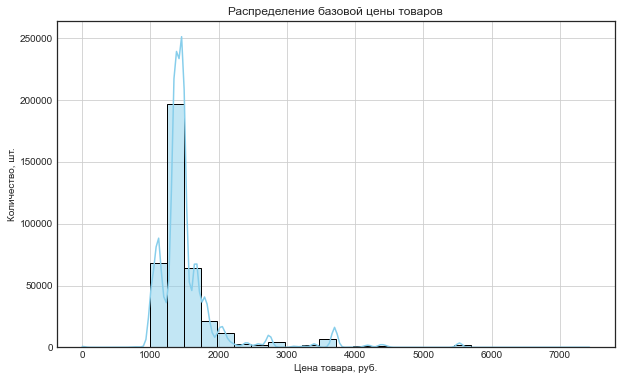

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Базовая цена товара"], bins=30, kde=True, color='skyblue')
plt.title("Распределение базовой цены товаров")
plt.xlabel("Цена товара, руб.")
plt.ylabel("Количество, шт.")
plt.grid(True)
plt.show()

# 6. Заключение

В ходе анализа были выявлены ключевые зависимости и сформированы рекомендации для улучшения продаж. Подход к анализу был поэтапным, структурированным и визуально оформленным.

Готов ответить на дополнительные вопросы или адаптировать подход под другие задачи.

---

## Благодарю за внимание!

Анализ выполнен с использованием Python и Jupyter Notebook.

Автор: [Султанов С.3]  
Дата выполнения: [09.04.2025г.]  